In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/android-games.csv')
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [4]:
for col in df.columns:
    print(col)
    print(df[col].dtype)
    print('Unique: ', df[col].unique())
    print('-'*100)

rank
int64
Unique:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
----------------------------------------------------------------------------------------------------
title
object
Unique:  ['Garena Free Fire - The Cobra' 'PUBG MOBILE: Graffiti Prank'
 'Mobile Legends: Bang Bang' ... '4 Fotos 1 Palavra'
 'زوايا - لعبة ستحرك زوايا عقلك' 'Word Life - Connect crosswords puzzle']
----------------------------------------------------------------------------------------------------
total ratings
int64
Unique:  [80678661 35971961 25836869 ...   114852   110293   109809]
-----------------------------------------------------------------------

In [5]:
plt.figure(figsize= (10,10))

array_category_rating = []
for i in df['category'].unique():
    total = df.loc[df['category'] == i]['total ratings'].sum()
    array_category_rating.append([i, total])

category_rating = pd.DataFrame(array_category_rating, columns= ['category', 'total ratings'])
category_rating = category_rating.sort_values('total ratings', ascending= False)
category_rating


,category,total ratings
0,GAME ACTION,413375744
6,GAME CASUAL,254644844
2,GAME ARCADE,185167028
14,GAME STRATEGY,183471744
10,GAME RACING,136352025
13,GAME SPORTS,125701632
12,GAME SIMULATION,107002045
9,GAME PUZZLE,98392699
1,GAME ADVENTURE,91971748
11,GAME ROLE PLAYING,74466720


<Figure size 720x720 with 0 Axes>

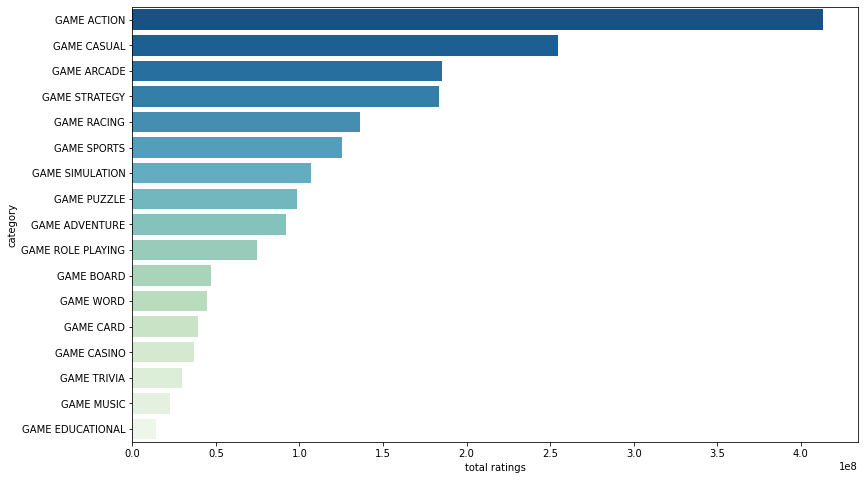

In [6]:
plt.figure(figsize= (13,8))

ax = sns.barplot(x= 'total ratings', y= 'category', data= category_rating, palette= 'GnBu_r')

In [7]:
df['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
100.0 k       2
1000.0 M      2
Name: installs, dtype: int64

In [8]:
df['num_installs'] = df['installs'].map({'500.0 M' : 500000000, '100.0 M' : 100000000, '50.0 M' : 50000000, '10.0 M' : 10000000, '5.0 M' : 5000000, '1.0 M' : 1000000, '1000.0 M' : 1000000000, 
 '500.0 k' : 500000, '100.0 k' : 100000})


/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3657 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3652 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/reinoso/.local/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 3607 missing from

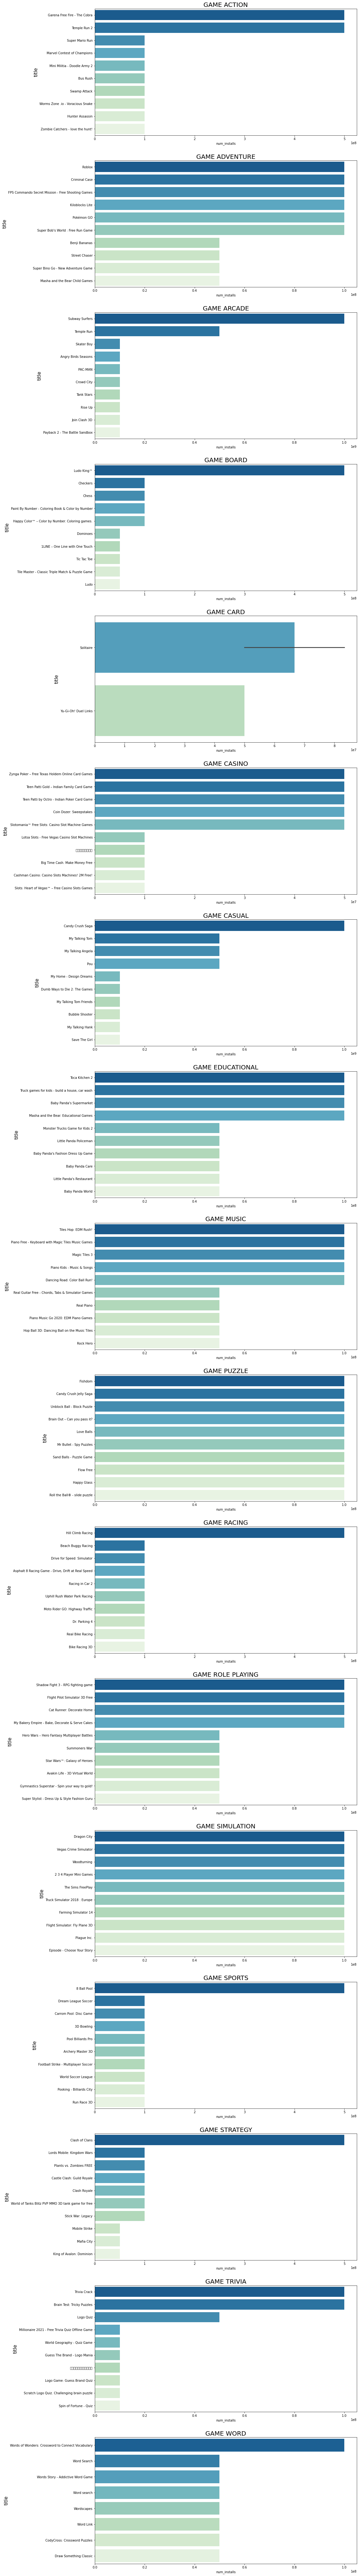

In [9]:

plt.figure(figsize= (15, 150))

i = 1
for cat in df['category'].unique():
    plt.subplot(17, 1, i)
    plt.title(cat, fontsize= 20)
    plt.xlabel('installs')
    plt.ylabel('Titles', fontsize= 15)

    df_category_installs = df.loc[df['category'] == cat].sort_values('num_installs', ascending= False).head(10)


    ax = sns.barplot(x= 'num_installs', y= 'title', data= df_category_installs, palette= 'GnBu_r')

    i += 1

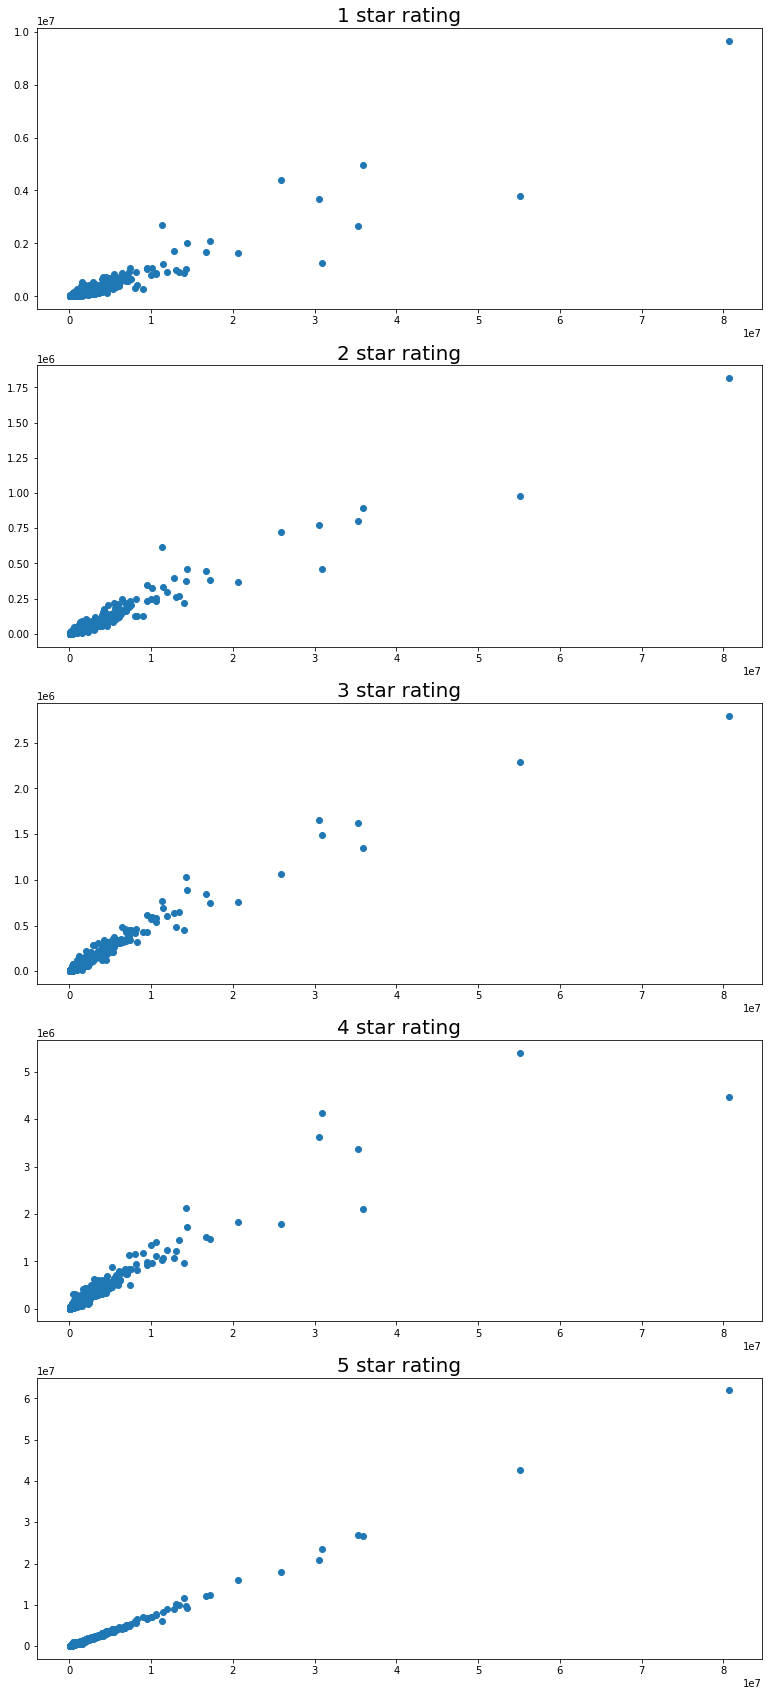

In [10]:
plt.figure(figsize= (13,30))

for i in range(1,6,1):
    plt.subplot(5, 1, i)
    plt.title(str(i) + ' star rating', fontsize= 20)
    plt.scatter(df['total ratings'], df['{} star ratings'.format(i)], )

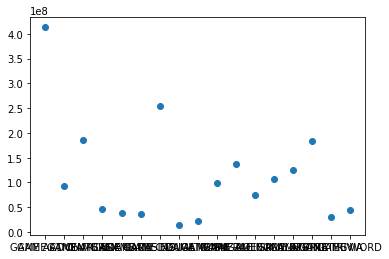

In [11]:
total = []
for cat in df['category'].unique():
    total.append(df.loc[df['category'] == cat]['total ratings'].sum())
    
plt.scatter(df['category'].unique(), total)



In [12]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,num_installs
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False,100000000
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False,100000000
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False,100000000
